## Visualizing Spotify Data

In [33]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [34]:
csv_path = 'spotify.csv'
df = pd.read_csv(csv_path)
df.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [36]:
df.shape

(2000, 18)

In [37]:
# check for duplicate values
df.duplicated().value_counts()

False    1941
True       59
Name: count, dtype: int64

In [38]:
df.drop_duplicates(inplace=True)
df.shape

(1941, 18)

In [39]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


### 1번 시각화

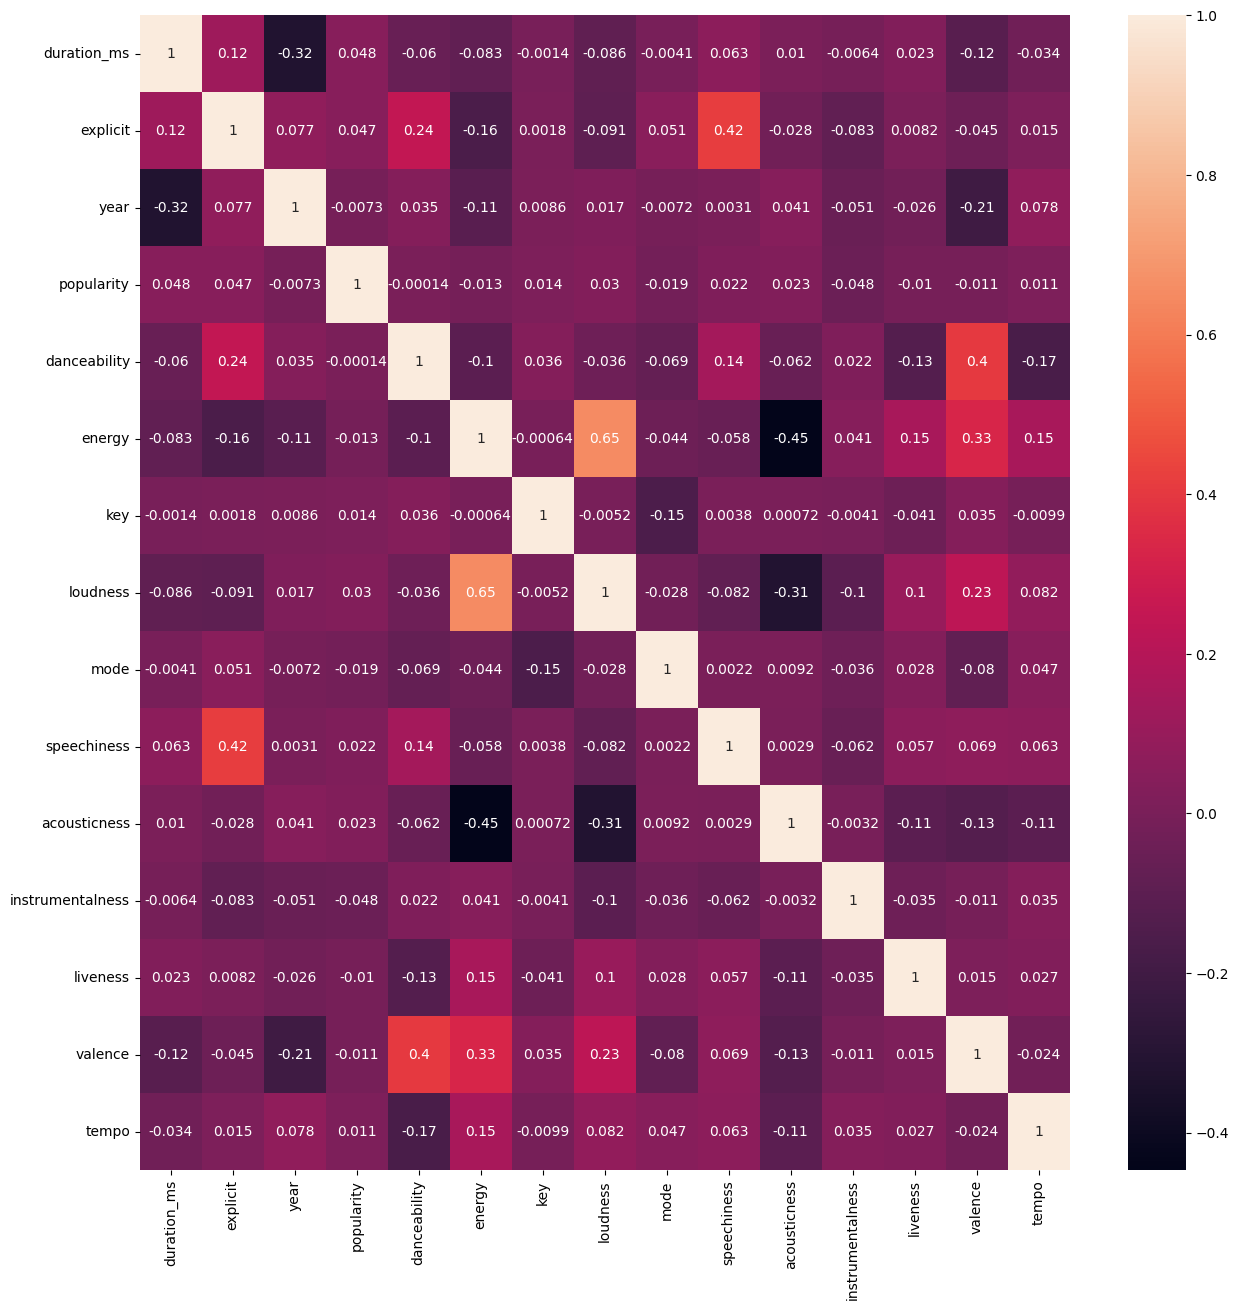

In [29]:
df_num = df.select_dtypes(include=[int, float, bool])

plt.figure(figsize=(15,15))
sns.heatmap(df_num.corr(), annot=True)
plt.show()

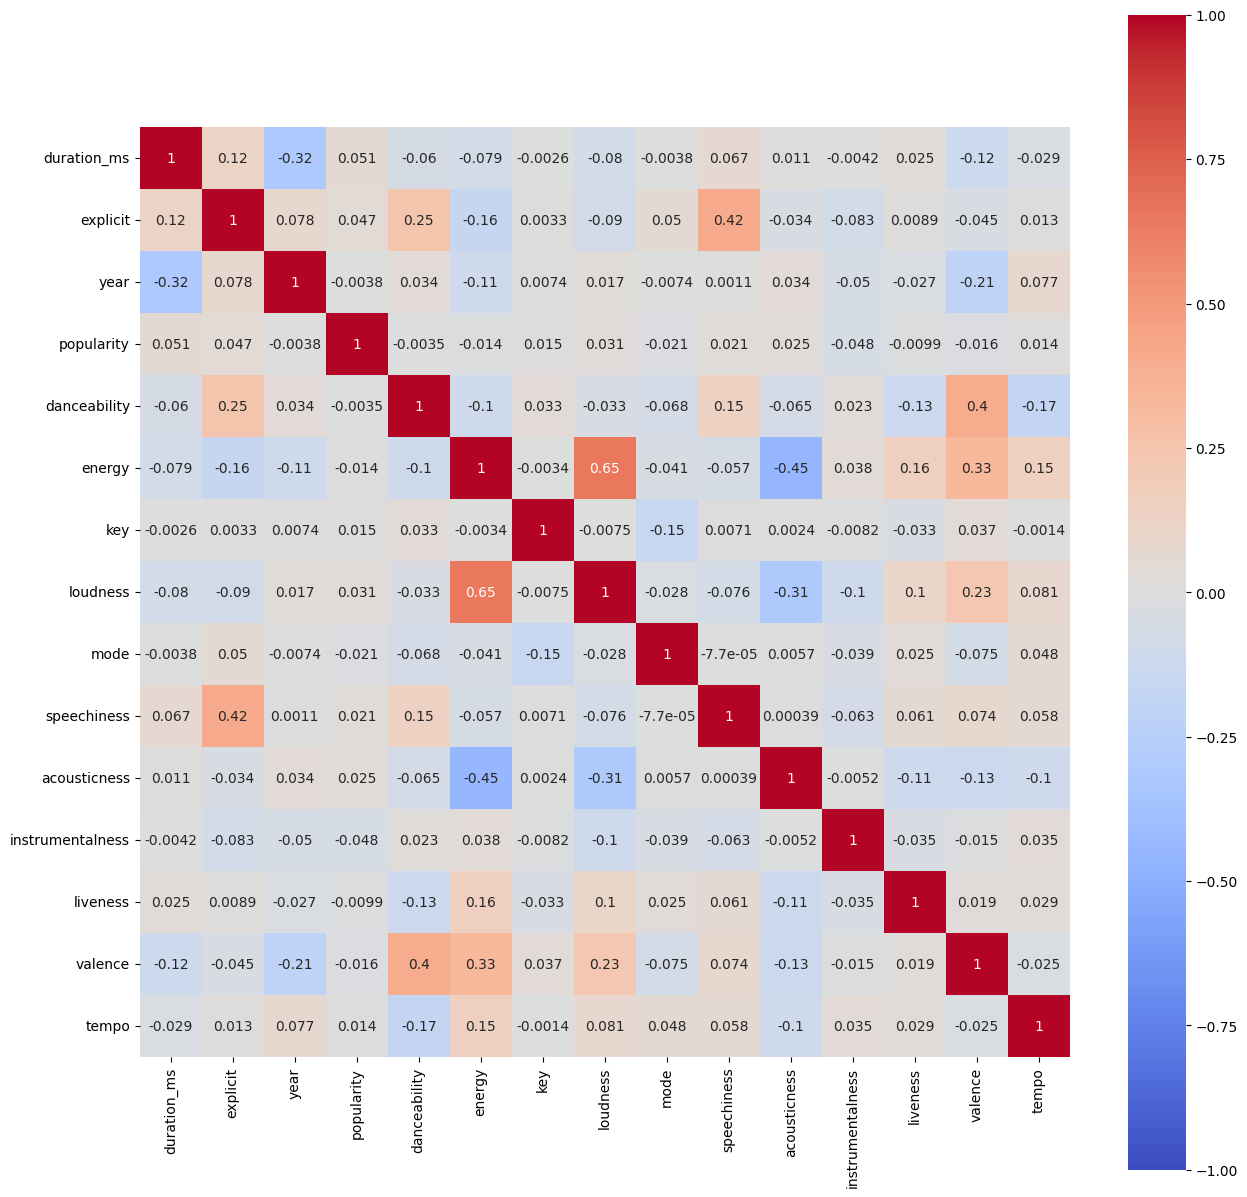

In [51]:
# [물음1] 개선점 제안
	# 1.	컬러맵 개선: 기본 컬러맵보다 coolwarm 컬러맵을 사용하여 상관관계의 명확한 표현과 가독성을 향상시킵니다.
	# 2.	중심점 설정: 상관관계 히트맵의 중심점을 0으로 설정하여 양의 상관관계와 음의 상관관계를 명확히 구분합니다.

## 여기에 코드를 작성해주세요 ##


plt.figure(figsize=(15, 15))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True)
plt.show()

In [52]:
# total songs based on genres
fig = px.histogram(df.groupby('genre', as_index=False).count().sort_values(by='song', ascending=False),
                   x='genre', y='song', template='plotly_dark', title='<b>Total songs based on genres</b>')
fig.show()

In [53]:
# popular genres based on popularity
fig = px.histogram(df.groupby('genre', as_index=False).sum().sort_values(by='popularity', ascending=False),
                   x='genre', y='popularity', color_discrete_sequence=['green'], template='plotly_dark',
                   title='<b>Popular genres based on popularity</b>')
fig.update_layout()

### 2번 시각화

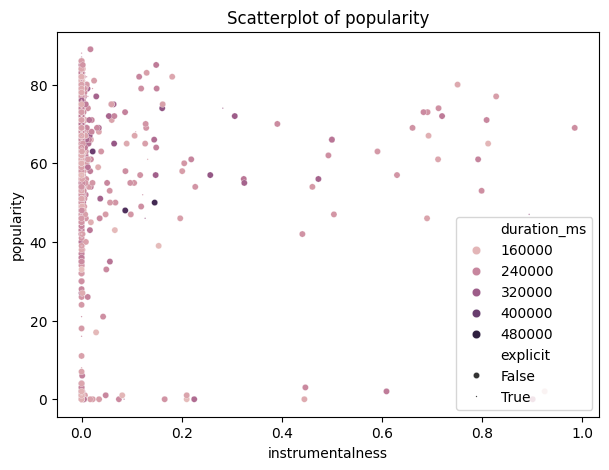

In [55]:
f, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x='instrumentalness', y='popularity',
                sizes=(1, 20),
                hue='duration_ms',
                size='explicit',
                linewidth=0.2,
                data=df, ax=ax,)

plt.title('Scatterplot of popularity')
plt.show()

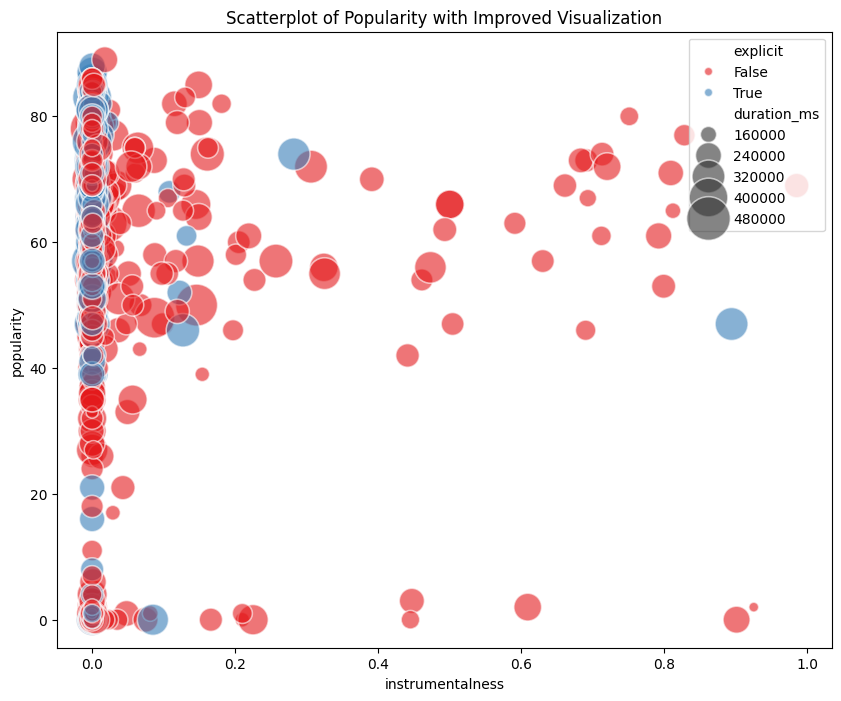

In [71]:
# [물음2] 개선점 제안
## 여기에 코드를 작성해주세요 ##
plt.figure(figsize=(10, 8))
sns.scatterplot(x='instrumentalness', y='popularity',
                size='duration_ms', sizes=(10, 1000),
                hue='explicit', palette='Set1',
                data=df, alpha=0.6)

plt.title('Scatterplot of Popularity with Improved Visualization')
plt.show()

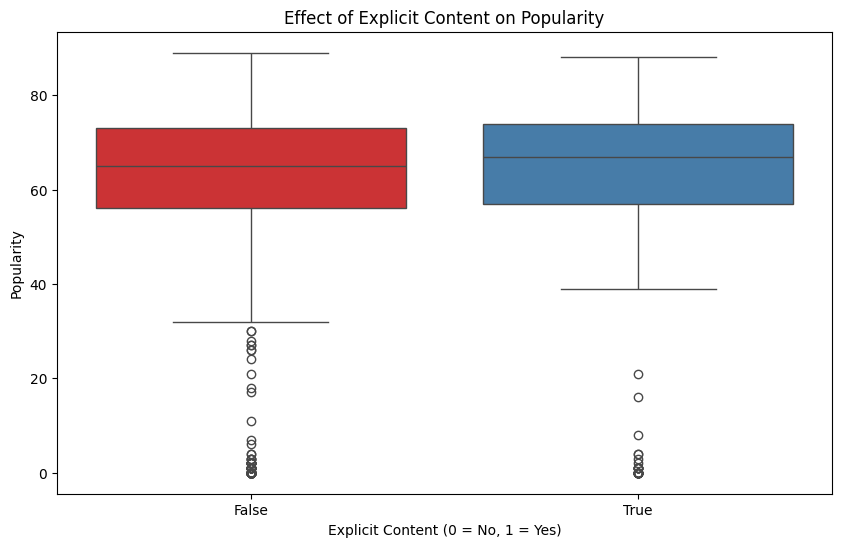

In [73]:
# [물음3] explicity가 popularity에 영향을 주는지 주지 않는지 판단하고 시각화를 통해 이를 정당화하세요.
## 여기에 코드를 작성해주세요 ##
plt.figure(figsize=(10, 6))
sns.boxplot(x='explicit', y='popularity', data=df, hue='explicit', palette='Set1', dodge=False)
plt.title('Effect of Explicit Content on Popularity')
plt.xlabel('Explicit Content (0 = No, 1 = Yes)')
plt.ylabel('Popularity')
plt.legend([],[], frameon=False)
plt.show()

<Figure size 1200x1200 with 0 Axes>

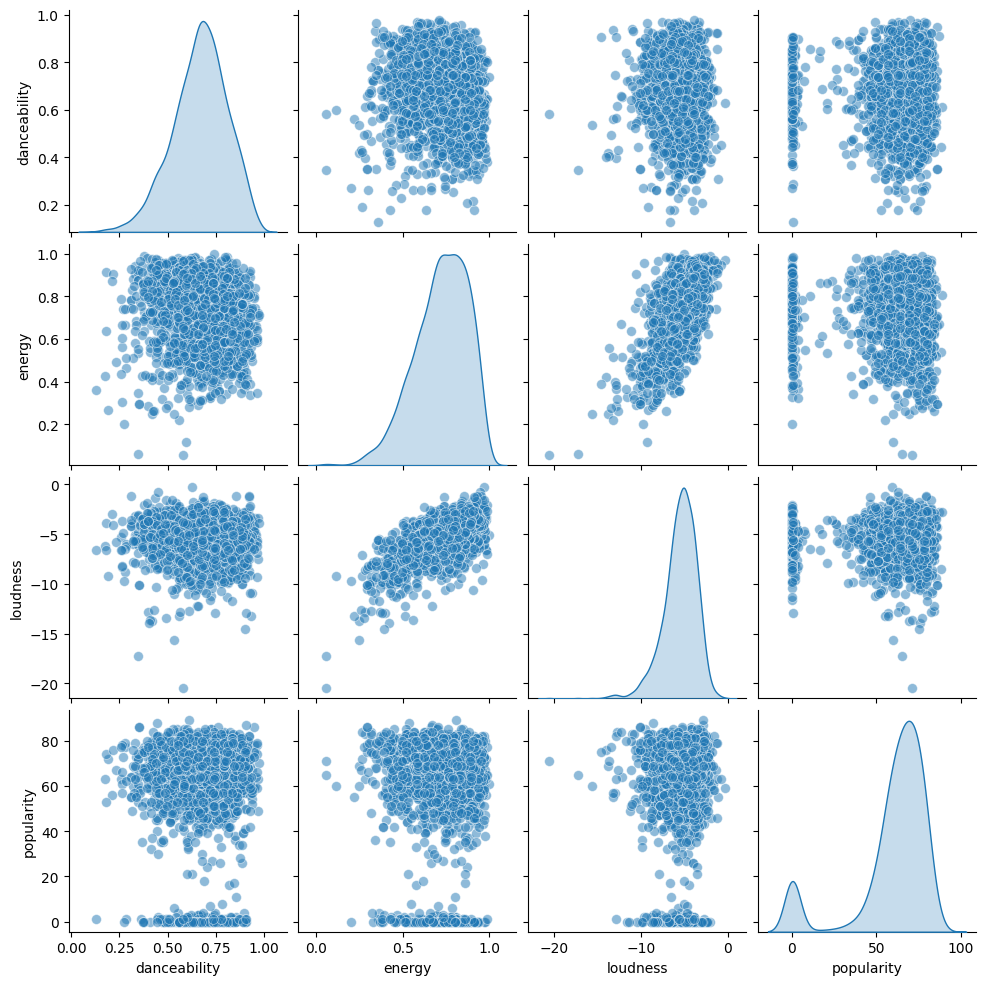

In [86]:
# [물음5] 적절한 시각화(들)

plt.figure(figsize=(12, 12))
sns.pairplot(df[['danceability', 'energy', 'loudness', 'popularity']], diag_kind='kde', plot_kws={'alpha':0.5, 's':50})
plt.show()

### 수고하셨습니다😆